In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import os
import csv
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [3]:
#Marcus Section


In [4]:
#load fresh csv file
Question_Two = "resources/IMDB_Movies2.csv"
Question_Two_df = pd.read_csv(Question_Two, encoding="utf-8")
Question_Two_df

Movie ID                                     original_title  \
0       367882  Indiana Jones and the Kingdom of the Crystal S...   
1       120912                                    Men in Black II   
2       157472                                      Clockstoppers   
3       227538                                           Spy Kids   
4       258038                                        Pootie Tang   
...        ...                                                ...   
1676   1130884                                     Shutter Island   
1677   1385826                              The Adjustment Bureau   
1678   1219289                                          Limitless   
1679    421239                                            Red Eye   
1680   1990181                                              Brake   

     date_published     genre  duration country          director  \
0        23/05/2008    Action       122     USA  Steven Spielberg   
1        13/09/2002    Action        88     USA  Barry Sonnenfeld   
2        26/07/2002    Action        94     USA   Jonathan Frakes   
3        24/08/2001    Action        88     USA  Robert Rodriguez   
4        29/06/2001    Action        81     USA        Louis C.K.   
...             ...       ...       ...     ...               ...   
1676     05/03/2010   Mystery       138     USA   Martin Scorsese   
1677     17/06/2011   Romance       106     USA      George Nolfi   
1678     15/04/2011    Sci-Fi       105     USA       Neil Burger   
1679     21/10/2005  Thriller        85     USA        Wes Craven   
1680     17/05/2012  Thriller        92     USA       Gabe Torres   

               actors_1  avg_vote     budget  usa_gross_income  \
0         Harrison Ford       6.1  185000000         317101119   
1       Tommy Lee Jones       6.2  140000000         193735288   
2        Jesse Bradford       5.2   26000000          36989956   
3      Antonio Banderas       5.5   35000000         112719001   
4        Lance Crouther       5.3    7000000           3313583   
...                 ...       ...        ...               ...   
1676  Leonardo DiCaprio       8.2   80000000         128012934   
1677         Matt Damon       7.0   50200000          62495645   
1678     Bradley Cooper       7.4   27000000          79249455   
1679     Rachel McAdams       6.4   26000000          57891803   
1680      Stephen Dorff       6.1     500000              4876   

      worlwide_gross_income  reviews_from_users  
0                 790653942                2173  
1                 445135288                 650  
2                  38793283                  95  
3                 147934180                 221  
4                   3313583                 133  
...                     ...                 ...  
1676              294804195                1286  
1677              127869379                 477  
1678              161849455                 488  
1679               96258201                 706  
1680                 102819                  88  

[1681 rows x 13 columns]

In [5]:
unique_list_genre = list(Question_Two_df['genre'].unique())
unique_list_genre

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller']

In [6]:
#reduce the list
Genre_Profit = Question_Two_df[['genre', 'worlwide_gross_income']]
Genre_Profit

genre  worlwide_gross_income
0       Action              790653942
1       Action              445135288
2       Action               38793283
3       Action              147934180
4       Action                3313583
...        ...                    ...
1676   Mystery              294804195
1677   Romance              127869379
1678    Sci-Fi              161849455
1679  Thriller               96258201
1680  Thriller                 102819

[1681 rows x 2 columns]

In [7]:
# sum the profits made by category
Genre_Profit_grouped = Genre_Profit.groupby(["genre"]).sum()
Genre_Profit_grouped

worlwide_gross_income
genre                           
Action               91270779105
Adventure             8321348021
Animation            49457243863
Biography             6945240793
Comedy               41138561095
Crime                 6214568943
Drama                17035824327
Family                1278931894
Fantasy                257805064
Horror                6440822447
Music                    7975812
Mystery                425034117
Romance                127869379
Sci-Fi                 161849455
Thriller                96361020

Text(0, 0.5, 'Total Income In American Dollars By Genre with 1 = $10,000,000,000')

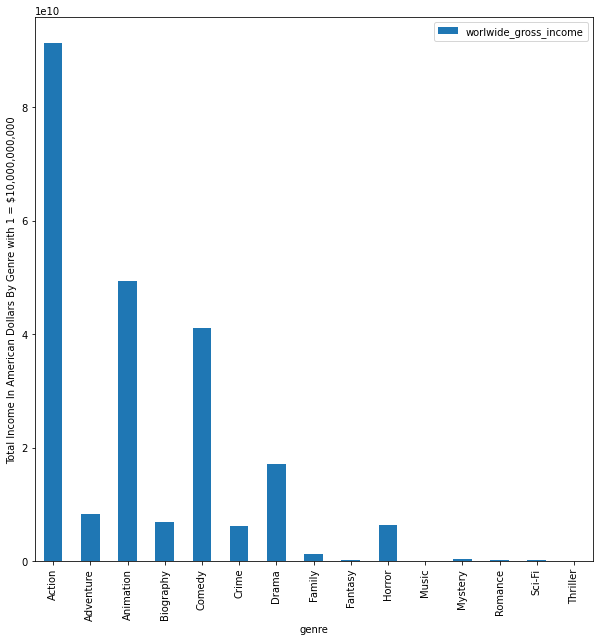

In [8]:
#show income total by genre 
axis = Genre_Profit_grouped.plot.bar(rot=90, figsize=(10, 10))
plt.ylabel("Total Income In American Dollars By Genre with 1 = $10,000,000,000")


In [9]:
# count movies by there genre
Genre_Profit_g_count = Genre_Profit.groupby(["genre"]).count()
Genre_Profit_g_count = Genre_Profit_g_count.rename(columns={'worlwide_gross_income':'Movie Total'})
Genre_Profit_g_count

Movie Total
genre                 
Action             372
Adventure           64
Animation          126
Biography           91
Comedy             566
Crime              105
Drama              259
Family               2
Fantasy              3
Horror              85
Music                1
Mystery              3
Romance              1
Sci-Fi               1
Thriller             2

In [10]:
#merge genre income total and total genre count dataframes
two_merge_df = pd.merge(Genre_Profit_g_count, Genre_Profit_grouped, on="genre")
two_merge_df

Movie Total  worlwide_gross_income
genre                                        
Action             372            91270779105
Adventure           64             8321348021
Animation          126            49457243863
Biography           91             6945240793
Comedy             566            41138561095
Crime              105             6214568943
Drama              259            17035824327
Family               2             1278931894
Fantasy              3              257805064
Horror              85             6440822447
Music                1                7975812
Mystery              3              425034117
Romance              1              127869379
Sci-Fi               1              161849455
Thriller             2               96361020

In [11]:
#calculate average income for the genre
two_merge_df['Average Income'] = two_merge_df['worlwide_gross_income']/two_merge_df['Movie Total']
two_merge_df

Movie Total  worlwide_gross_income  Average Income
genre                                                        
Action             372            91270779105    2.453516e+08
Adventure           64             8321348021    1.300211e+08
Animation          126            49457243863    3.925178e+08
Biography           91             6945240793    7.632133e+07
Comedy             566            41138561095    7.268297e+07
Crime              105             6214568943    5.918637e+07
Drama              259            17035824327    6.577538e+07
Family               2             1278931894    6.394659e+08
Fantasy              3              257805064    8.593502e+07
Horror              85             6440822447    7.577438e+07
Music                1                7975812    7.975812e+06
Mystery              3              425034117    1.416780e+08
Romance              1              127869379    1.278694e+08
Sci-Fi               1              161849455    1.618495e+08
Thriller             2               96361020    4.818051e+07

In [12]:
#remove scientific notation 
two_merge_df['Average Income'] = two_merge_df['Average Income'].astype('int64') 
two_merge_df

Movie Total  worlwide_gross_income  Average Income
genre                                                        
Action             372            91270779105       245351556
Adventure           64             8321348021       130021062
Animation          126            49457243863       392517808
Biography           91             6945240793        76321327
Comedy             566            41138561095        72682970
Crime              105             6214568943        59186370
Drama              259            17035824327        65775383
Family               2             1278931894       639465947
Fantasy              3              257805064        85935021
Horror              85             6440822447        75774381
Music                1                7975812         7975812
Mystery              3              425034117       141678039
Romance              1              127869379       127869379
Sci-Fi               1              161849455       161849455
Thriller             2               96361020        48180510

<AxesSubplot:xlabel='genre', ylabel='Average Income In American Dollars with 1 = $100,000,000'>

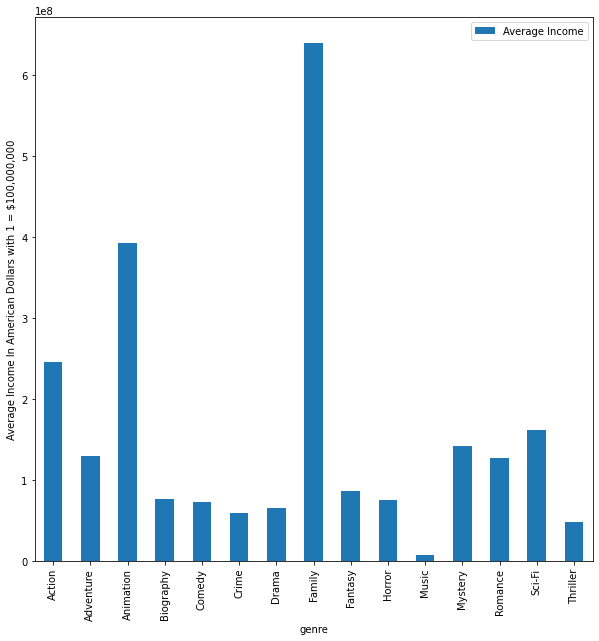

In [13]:
Gen_Avg_Inc = two_merge_df[['Average Income']]
bar_avg_gen_prof = Gen_Avg_Inc.plot.bar(rot=90, figsize=(10, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")
bar_avg_gen_prof

In [14]:
#Remove genres with low movie count
Significant_genres = two_merge_df.loc[two_merge_df['Movie Total'] > 50]
Significant_genres


Movie Total  worlwide_gross_income  Average Income
genre                                                        
Action             372            91270779105       245351556
Adventure           64             8321348021       130021062
Animation          126            49457243863       392517808
Biography           91             6945240793        76321327
Comedy             566            41138561095        72682970
Crime              105             6214568943        59186370
Drama              259            17035824327        65775383
Horror              85             6440822447        75774381

<AxesSubplot:xlabel='genre', ylabel='Average Income In American Dollars with 1 = $100,000,000'>

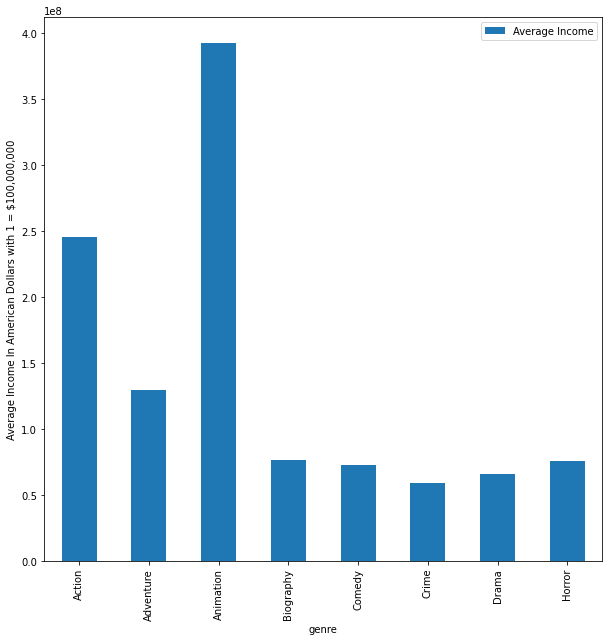

In [15]:
#show reduced bar plot
Gen_Avg_Inc2 = Significant_genres[['Average Income']]
bar_avg_gen_prof = Gen_Avg_Inc2.plot.bar(rot=90, figsize=(10, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")
bar_avg_gen_prof

In [16]:
#load csv file with the years in it
Year_df = "resources/rename_year_df.csv"
Year_df = pd.read_csv(Year_df, encoding="utf-8")
Year_df

Unnamed: 0  Movie ID                                              Title  \
0            883   4364194                           The Peanut Butter Falcon   
1            309   1634106                                          Bloodshot   
2             44   7713068  Birds of Prey: And the Fantabulous Emancipatio...   
3           1519   3281548                                       Little Women   
4           1305   5727208                                         Uncut Gems   
...          ...       ...                                                ...   
1676        1244    204626                                        The Watcher   
1677        1648    195714                                  Final Destination   
1678         932    198021                                 Where the Heart Is   
1679         931    186975                                        Down to You   
1680        1452    210616                                       Center Stage   

            Date   Genre  RunTime country                        Director  \
0     2020-06-15  Comedy       97     USA  Tyler Nilson, Michael Schwartz   
1     2020-03-27  Action      109     USA                     Dave Wilson   
2     2020-06-02  Action      109     USA                       Cathy Yan   
3     2020-09-01   Drama      135     USA                    Greta Gerwig   
4     2020-01-31   Crime      135     USA       Benny Safdie, Josh Safdie   
...          ...     ...      ...     ...                             ...   
1676  2000-09-17   Crime       97     USA                   Joe Charbanic   
1677  2000-08-25  Horror       98     USA                      James Wong   
1678  2000-09-14  Comedy      120     USA                   Matt Williams   
1679  2000-04-28  Comedy       91     USA                   Kris Isacsson   
1680  2000-09-15   Drama      115     USA                 Nicholas Hytner   

                  Actors  Average_Vote    Budget  USA Gross Income  \
0         Zack Gottsagen           7.6   6200000          20457151   
1             Vin Diesel           5.7  45000000          10021787   
2          Margot Robbie           6.1  84500000          84158461   
3          Saoirse Ronan           7.8  40000000         108101214   
4         Mesfin Lamengo           7.4  19000000          50023780   
...                  ...           ...       ...               ...   
1676        James Spader           5.3  30000000          28946615   
1677          Devon Sawa           6.7  23000000          53331147   
1678     Natalie Portman           6.8  15000000          33772838   
1679  Freddie Prinze Jr.           5.0  11000000          20069008   
1680       Amanda Schull           6.7  29000000          17200925   

      Worldwide Gross Income  Fan Reviews  Net Profit Worldwide  Year  
0                   23620709          423              17420709  2020  
1                   30855391          672             -14144609  2020  
2                  201858461         2222             117358461  2020  
3                  216601214          897             176601214  2020  
4                   50023780         2193              31023780  2020  
...                      ...          ...                   ...   ...  
1676                47267829          196              17267829  2000  
1677               112880294          730              89880294  2000  
1678                40863718          247              25863718  2000  
1679                24419914          173              13419914  2000  
1680                26385941          220              -2614059  2000  

[1681 rows x 16 columns]

In [17]:
#last five years sumary
Year_15_20_df = Year_df.loc[Year_df['Year'] >= 2015]
Year_15_20_df

Unnamed: 0  Movie ID                                              Title  \
0           883   4364194                           The Peanut Butter Falcon   
1           309   1634106                                          Bloodshot   
2            44   7713068  Birds of Prey: And the Fantabulous Emancipatio...   
3          1519   3281548                                       Little Women   
4          1305   5727208                                         Uncut Gems   
..          ...       ...                                                ...   
342        1481   2436386                                    Project Almanac   
343         882   4270516                                            Grandma   
344         519   2262227                                   The Book of Life   
345          57   2126355                                        San Andreas   
346        1539   2322441                               Fifty Shades of Grey   

           Date      Genre  RunTime country                        Director  \
0    2020-06-15     Comedy       97     USA  Tyler Nilson, Michael Schwartz   
1    2020-03-27     Action      109     USA                     Dave Wilson   
2    2020-06-02     Action      109     USA                       Cathy Yan   
3    2020-09-01      Drama      135     USA                    Greta Gerwig   
4    2020-01-31      Crime      135     USA       Benny Safdie, Josh Safdie   
..          ...        ...      ...     ...                             ...   
342  2015-01-30      Drama      106     USA                  Dean Israelite   
343  2015-09-18     Comedy       79     USA                      Paul Weitz   
344  2015-05-28  Animation       95     USA              Jorge R. Gutiérrez   
345  2015-05-28     Action      114     USA                     Brad Peyton   
346  2015-12-02      Drama      125     USA              Sam Taylor-Johnson   

             Actors  Average_Vote     Budget  USA Gross Income  \
0    Zack Gottsagen           7.6    6200000          20457151   
1        Vin Diesel           5.7   45000000          10021787   
2     Margot Robbie           6.1   84500000          84158461   
3     Saoirse Ronan           7.8   40000000         108101214   
4    Mesfin Lamengo           7.4   19000000          50023780   
..              ...           ...        ...               ...   
342    Jonny Weston           6.4   12000000          22348241   
343     Lily Tomlin           6.7     600000           6980524   
344      Diego Luna           7.3   50000000          50151543   
345  Dwayne Johnson           6.1  110000000         155190832   
346  Dakota Johnson           4.1   40000000         166167230   

     Worldwide Gross Income  Fan Reviews  Net Profit Worldwide  Year  
0                  23620709          423              17420709  2020  
1                  30855391          672             -14144609  2020  
2                 201858461         2222             117358461  2020  
3                 216601214          897             176601214  2020  
4                  50023780         2193              31023780  2020  
..                      ...          ...                   ...   ...  
342                33213241          237              21213241  2015  
343                 7205073           78               6605073  2015  
344                99783556          139              49783556  2015  
345               473990832          624             363990832  2015  
346               569651467         1551             529651467  2015  

[347 rows x 16 columns]

In [18]:
#films made in last five years
Year_15_20_df_count = Year_15_20_df.groupby(["Genre"]).count()
Year_15_20_df_count = Year_15_20_df_count.rename(columns={'Worldwide Gross Income':'Movie Total'})
Year_15_20_df_counted = Year_15_20_df_count[['Movie Total']]
Year_15_20_df_counted

Movie Total
Genre                 
Action              94
Adventure            8
Animation           28
Biography           38
Comedy              88
Crime               15
Drama               49
Family               1
Horror              26

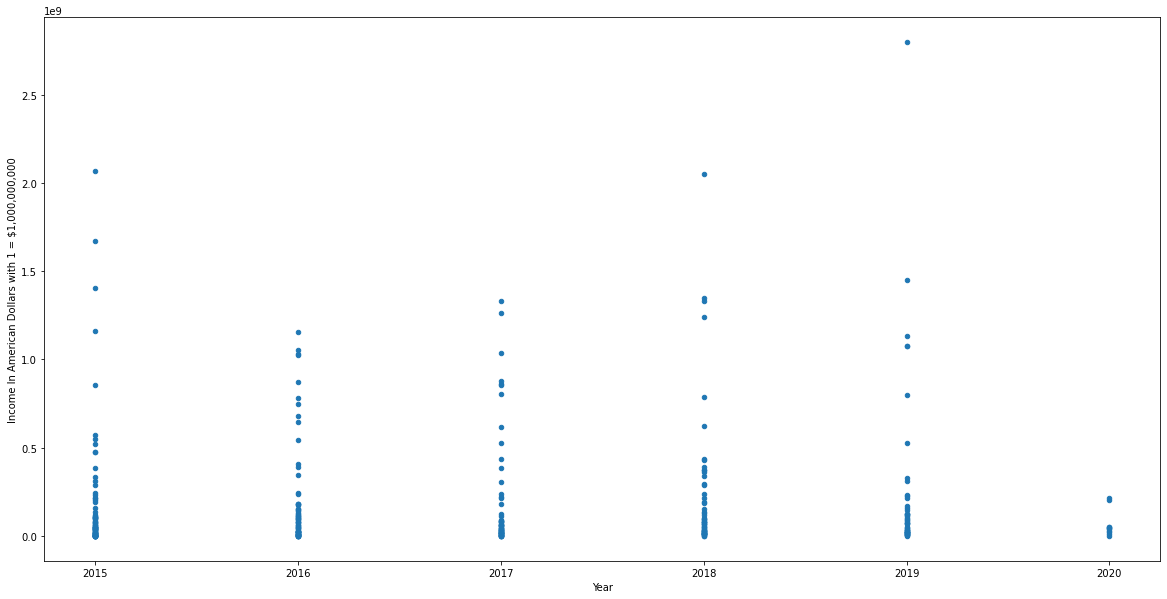

In [19]:
#show scatter of films by year and there income
Year_15_20_df.plot(x='Year', y='Worldwide Gross Income', kind='scatter', figsize=(20, 10))
plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.show()

In [20]:
#get frame to analyze the animation genre which is has highest aveage of signifacant movies
Year_15_20_df_an = Year_15_20_df[Year_15_20_df["Genre"].str.contains("Animation")==True]
Year_15_20_df_an

Unnamed: 0  Movie ID                                   Title        Date  \
17          532   4520988                               Frozen II  2019-11-27   
24          514   1979376                             Toy Story 4  2019-06-26   
37          457   5814534                       Spies in Disguise  2019-12-25   
59          535   5848272               Ralph Breaks the Internet  2019-01-01   
72          458   7424200           Teen Titans Go! To the Movies  2018-06-09   
78          456   4633694       Spider-Man: Into the Spider-Verse  2018-12-25   
80          455   3606756                           Incredibles 2  2018-09-19   
102         536   6182908                               Smallfoot  2018-04-10   
156         528   3469046                         Despicable Me 3  2017-08-24   
157         530   3606752                                  Cars 3  2017-09-14   
158         531   3874544                           The Boss Baby  2017-04-20   
162         534   4877122                         The Emoji Movie  2017-09-28   
166         543   2380307                                    Coco  2017-12-28   
188         533   4624424                                  Storks  2016-10-20   
206         529   3521164                                   Moana  2016-12-22   
207         520   2277860                            Finding Dory  2016-09-15   
208         527   3416828               Ice Age: Collision Course  2016-08-22   
222         524   2948356                                Zootopia  2016-02-18   
228         509   1679335                                  Trolls  2016-10-27   
233         460   4853102                Batman: The Killing Joke  2016-07-25   
315         525   2974918  Alvin and the Chipmunks: The Road Chip  2015-12-23   
317         556   2510894                    Hotel Transylvania 2  2015-08-10   
324         521   2293640                                 Minions  2015-08-27   
327         555   2452042                       The Peanuts Movie  2015-05-11   
336         518   2224026                                    Home  2015-03-26   
339         517   2096673                              Inside Out  2015-09-16   
341         515   1979388                       The Good Dinosaur  2015-11-25   
344         519   2262227                        The Book of Life  2015-05-28   

         Genre  RunTime country                           Director  \
17   Animation      103     USA           Chris Buck, Jennifer Lee   
24   Animation      100     USA                        Josh Cooley   
37   Animation      102     USA             Nick Bruno, Troy Quane   
59   Animation      112     USA          Phil Johnston, Rich Moore   
72   Animation       84     USA  Aaron Horvath, Peter Rida Michail   
78   Animation      117     USA      Bob Persichetti, Peter Ramsey   
80   Animation      118     USA                          Brad Bird   
102  Animation       96     USA    Karey Kirkpatrick, Jason Reisig   
156  Animation       89     USA          Kyle Balda, Pierre Coffin   
157  Animation      102     USA                          Brian Fee   
158  Animation       97     USA                        Tom McGrath   
162  Animation       86     USA                       Tony Leondis   
166  Animation      105     USA         Lee Unkrich, Adrian Molina   
188  Animation       87     USA   Nicholas Stoller, Doug Sweetland   
206  Animation      107     USA          Ron Clements, John Musker   
207  Animation       97     USA      Andrew Stanton, Angus MacLane   
208  Animation       94     USA       Mike Thurmeier, Galen T. Chu   
222  Animation      108     USA           Byron Howard, Rich Moore   
228  Animation       92     USA          Mike Mitchell, Walt Dohrn   
233  Animation       76     USA                            Sam Liu   
315  Animation       92     USA                        Walt Becker   
317  Animation       89     USA                 Genndy Tartakovsky   
324  Animation       91     USA          Kyle

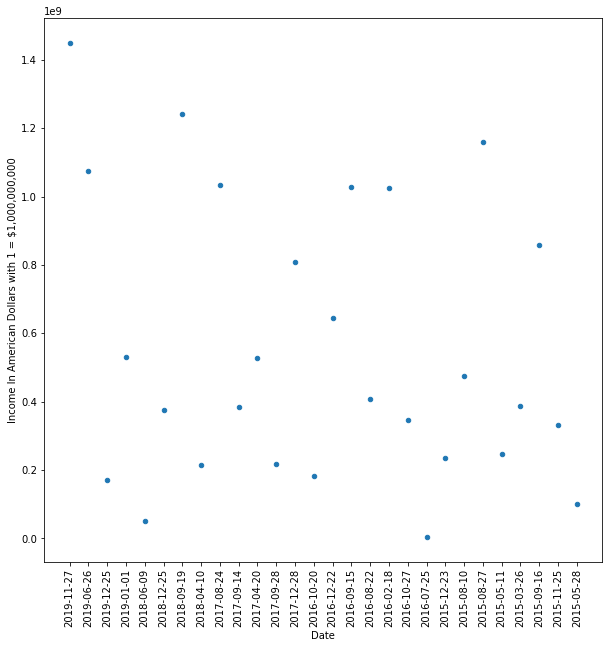

In [21]:
# show the sucusses of animation over last five years
Year_15_20_df_an.plot(x='Date', y='Worldwide Gross Income', kind='scatter', rot=90, figsize=(10, 10))
plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.show()
#the graph shows a flat spread meaning there where no years when animation had an uptik of interest 
#shis is good as it means income is steady from this genre no matter the year

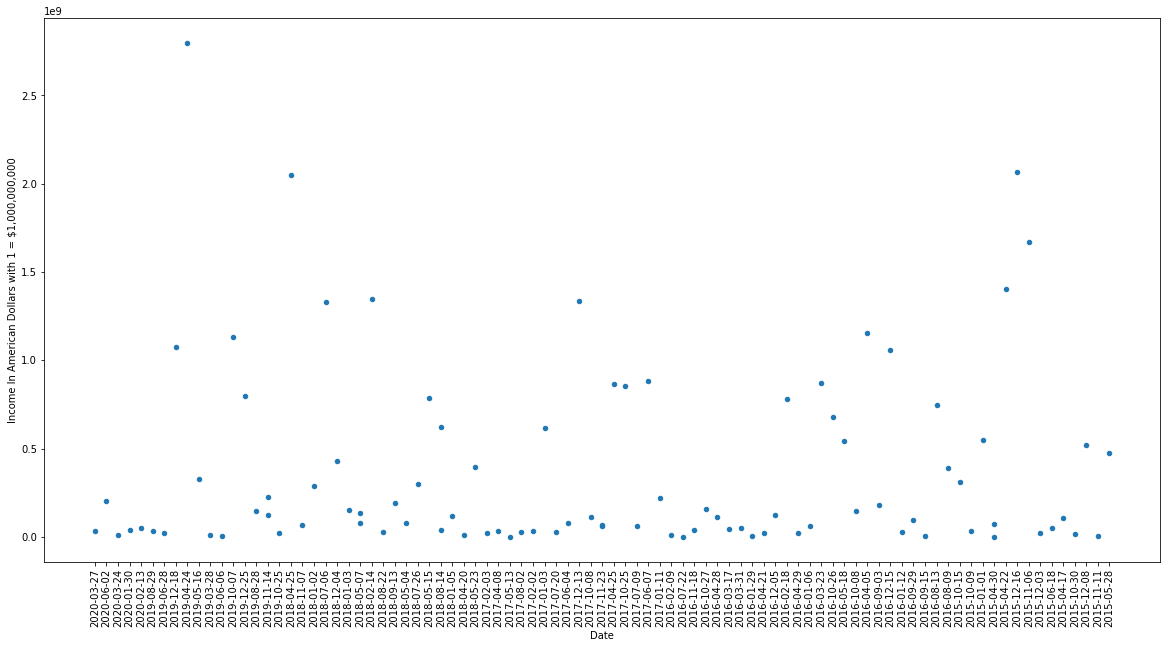

In [22]:
#This graph shows income from action movies over the last five years
Year_15_20_df_ac = Year_15_20_df[Year_15_20_df["Genre"].str.contains("Action")==True]
Year_15_20_df_ac.plot(x='Date', y='Worldwide Gross Income', kind='scatter', rot=90, figsize=(20, 10))
plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.show() 
#the income from action movies is also steady

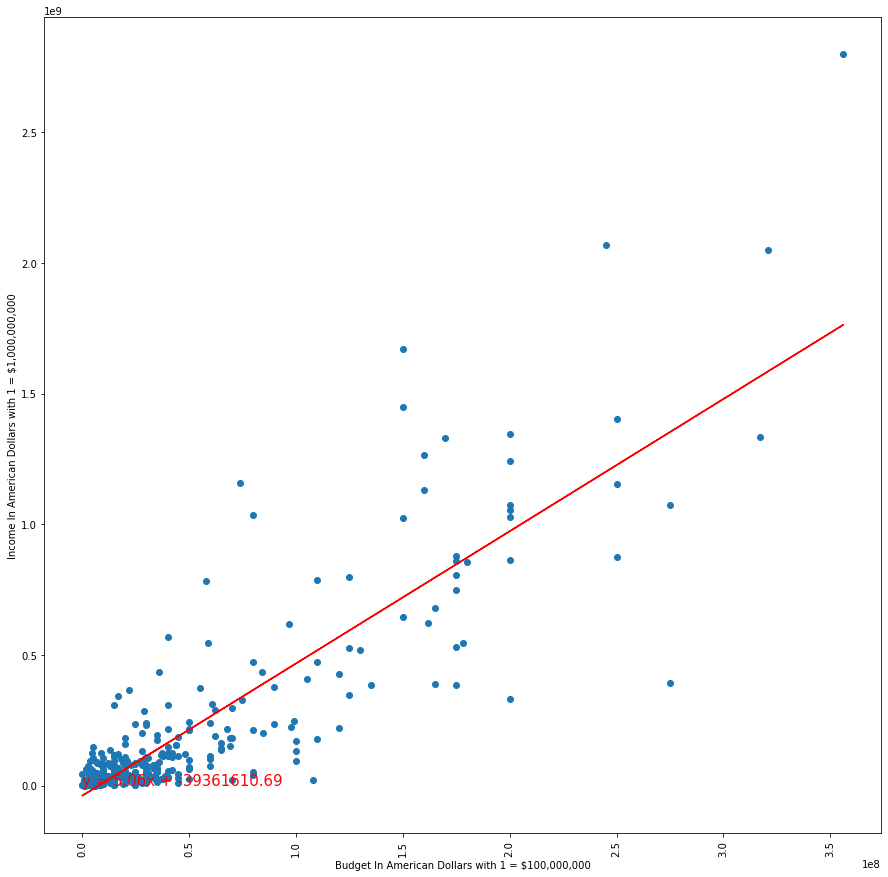

In [23]:
#shows if there is a direct relationship between budget and income made however it also shows there are some outliers
#where movies make more than what they would be predicted or less than predicted 
#the relationship does become less reliable as the bugdet increases showing there is more risk in expensive movies
Year_15_20_df.plot(x='Budget', y='Worldwide Gross Income', kind='scatter', rot=90, figsize=(15, 15))

x_values = Year_15_20_df['Budget']
y_values = Year_15_20_df['Worldwide Gross Income']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.xlabel("Budget In American Dollars with 1 = $100,000,000")

plt.show() 

In [24]:
#import original data with all genres
Original = "Resources/IMDB_Mov.csv"
Original_df = pd.read_csv(Original, encoding="utf-8")
Original_df = Original_df.rename(columns={'original_title':'Title'})
Original_df_reduced = Original_df[['genre', 'Title']]
Original_df_reduced

genre                       Title
0      Comedy, Fantasy, Romance              Kate & Leopold
1         Drama, Music, Romance                     Glitter
2                Drama, Romance            Fa yeung nin wah
3                 Comedy, Drama              State and Main
4                 Comedy, Drama  Sånger från andra våningen
...                         ...                         ...
5482      Adventure, Drama, War                 Da 5 Bloods
5483            Comedy, Romance         The Kissing Booth 2
5484  Animation, Drama, Fantasy        J'ai perdu mon corps
5485            Comedy, Romance            Falling Inn Love
5486             Action, Comedy             Coffee & Kareem

[5487 rows x 2 columns]

In [25]:
#Interested in data from the last five years so merge with 5 year data
Merge_Genres = pd.merge(Original_df_reduced, Year_15_20_df, on="Title", how='right')
Merge_Genres

genre  \
0                   Comedy, Drama   
1           Action, Drama, Sci-Fi   
2        Action, Adventure, Crime   
3                  Drama, Romance   
4          Crime, Drama, Thriller   
..                            ...   
348        Drama, Mystery, Sci-Fi   
349                 Comedy, Drama   
350  Animation, Adventure, Comedy   
351      Action, Adventure, Drama   
352      Drama, Romance, Thriller   

                                                 Title  Unnamed: 0  Movie ID  \
0                             The Peanut Butter Falcon         883   4364194   
1                                            Bloodshot         309   1634106   
2    Birds of Prey: And the Fantabulous Emancipatio...          44   7713068   
3                                         Little Women        1519   3281548   
4                                           Uncut Gems        1305   5727208   
..                                                 ...         ...       ...   
348                                    Project Almanac        1481   2436386   
349                                            Grandma         882   4270516   
350                                   The Book of Life         519   2262227   
351                                        San Andreas          57   2126355   
352                               Fifty Shades of Grey        1539   2322441   

           Date      Genre  RunTime country                        Director  \
0    2020-06-15     Comedy       97     USA  Tyler Nilson, Michael Schwartz   
1    2020-03-27     Action      109     USA                     Dave Wilson   
2    2020-06-02     Action      109     USA                       Cathy Yan   
3    2020-09-01      Drama      135     USA                    Greta Gerwig   
4    2020-01-31      Crime      135     USA       Benny Safdie, Josh Safdie   
..          ...        ...      ...     ...                             ...   
348  2015-01-30      Drama      106     USA                  Dean Israelite   
349  2015-09-18     Comedy       79     USA                      Paul Weitz   
350  2015-05-28  Animation       95     USA              Jorge R. Gutiérrez   
351  2015-05-28     Action      114     USA                     Brad Peyton   
352  2015-12-02      Drama      125     USA              Sam Taylor-Johnson   

             Actors  Average_Vote     Budget  USA Gross Income  \
0    Zack Gottsagen           7.6    6200000          20457151   
1        Vin Diesel           5.7   45000000          10021787   
2     Margot Robbie           6.1   84500000          84158461   
3     Saoirse Ronan           7.8   40000000         108101214   
4    Mesfin Lamengo           7.4   19000000          50023780   
..              ...           ...        ...               ...   
348    Jonny Weston           6.4   12000000          22348241   
349     Lily Tomlin           6.7     600000           6980524   
350      Diego Luna           7.3   50000000          50151543   
351  Dwayne Johnson           6.1  110000000         155190832   
352  Dakota Johnson           4.1   40000000         166167230   

     Worldwide Gross Income  Fan Reviews  Net Profit Worldwide  Year  
0                  23620709          423              17420709  2020  
1                  30855391          672             -14144609  2020  
2                 201858461         2222             117358461  2020  
3                 216601214          897             176601214  2020  
4                  50023780         2193              31023780  2020  
..                      ...          ...                   ...   ...  
348                33213241          237              21213241  2015  
349                 7205073           78               6605073  2015  
350                99783556          139              49783556  2015  
351               473990832          624             363990832  2015  
352               569651467         1551             529651467  2015  

[353 rows x 17 columns]

In [26]:
#find the sub genres and drop the extra main genre that is created
sub = Merge_Genres['genre'].str.split(',', expand=True)
sub = sub.rename(columns={1:' Sub Genre'})
sub = sub.rename(columns={2:' Secondary Sub Genre'})
sub.drop(0, axis=1, inplace=True)
sub

Sub Genre  Secondary Sub Genre
0         Drama                 None
1         Drama               Sci-Fi
2     Adventure                Crime
3       Romance                 None
4         Drama             Thriller
..          ...                  ...
348     Mystery               Sci-Fi
349       Drama                 None
350   Adventure               Comedy
351   Adventure                Drama
352     Romance             Thriller

[353 rows x 2 columns]

In [27]:
#merge information gathered on sub genres back into our data frame 
Merge_Genres2 = pd.merge(sub, Merge_Genres, left_index=True, right_index=True)
Merge_Genres2.drop('genre', axis=1, inplace=True)
Merge_Genres2

Sub Genre  Secondary Sub Genre  \
0         Drama                 None   
1         Drama               Sci-Fi   
2     Adventure                Crime   
3       Romance                 None   
4         Drama             Thriller   
..          ...                  ...   
348     Mystery               Sci-Fi   
349       Drama                 None   
350   Adventure               Comedy   
351   Adventure                Drama   
352     Romance             Thriller   

                                                 Title  Unnamed: 0  Movie ID  \
0                             The Peanut Butter Falcon         883   4364194   
1                                            Bloodshot         309   1634106   
2    Birds of Prey: And the Fantabulous Emancipatio...          44   7713068   
3                                         Little Women        1519   3281548   
4                                           Uncut Gems        1305   5727208   
..                                                 ...         ...       ...   
348                                    Project Almanac        1481   2436386   
349                                            Grandma         882   4270516   
350                                   The Book of Life         519   2262227   
351                                        San Andreas          57   2126355   
352                               Fifty Shades of Grey        1539   2322441   

           Date      Genre  RunTime country                        Director  \
0    2020-06-15     Comedy       97     USA  Tyler Nilson, Michael Schwartz   
1    2020-03-27     Action      109     USA                     Dave Wilson   
2    2020-06-02     Action      109     USA                       Cathy Yan   
3    2020-09-01      Drama      135     USA                    Greta Gerwig   
4    2020-01-31      Crime      135     USA       Benny Safdie, Josh Safdie   
..          ...        ...      ...     ...                             ...   
348  2015-01-30      Drama      106     USA                  Dean Israelite   
349  2015-09-18     Comedy       79     USA                      Paul Weitz   
350  2015-05-28  Animation       95     USA              Jorge R. Gutiérrez   
351  2015-05-28     Action      114     USA                     Brad Peyton   
352  2015-12-02      Drama      125     USA              Sam Taylor-Johnson   

             Actors  Average_Vote     Budget  USA Gross Income  \
0    Zack Gottsagen           7.6    6200000          20457151   
1        Vin Diesel           5.7   45000000          10021787   
2     Margot Robbie           6.1   84500000          84158461   
3     Saoirse Ronan           7.8   40000000         108101214   
4    Mesfin Lamengo           7.4   19000000          50023780   
..              ...           ...        ...               ...   
348    Jonny Weston           6.4   12000000          22348241   
349     Lily Tomlin           6.7     600000           6980524   
350      Diego Luna           7.3   50000000          50151543   
351  Dwayne Johnson           6.1  110000000         155190832   
352  Dakota Johnson           4.1   40000000         166167230   

     Worldwide Gross Income  Fan Reviews  Net Profit Worldwide  Year  
0                  23620709          423              17420709  2020  
1                  30855391          672             -14144609  2020  
2                 201858461         2222             117358461  2020  
3                 216601214          897             176601214  2020  
4                  50023780         2193              31023780  2020  
..                      ...          ...                   ...   ...  
348                33213241          237              21213241  2015  
349                 7205073           78               6605073  2015  
350                99783556          139              49783556  2015  
351               473990832          624             363990832  2015  
352               569651467         1551 

In [28]:
animation15_20 = Merge_Genres2[Merge_Genres2["Genre"].str.contains("Animation")==True]
animation15_20

Sub Genre  Secondary Sub Genre                                   Title  \
17    Adventure               Comedy                               Frozen II   
25    Adventure               Comedy                             Toy Story 4   
38       Action            Adventure                       Spies in Disguise   
61    Adventure               Comedy               Ralph Breaks the Internet   
74       Action            Adventure           Teen Titans Go! To the Movies   
81       Action            Adventure       Spider-Man: Into the Spider-Verse   
83       Action            Adventure                           Incredibles 2   
105   Adventure               Comedy                               Smallfoot   
159   Adventure               Comedy                         Despicable Me 3   
160   Adventure               Comedy                                  Cars 3   
161   Adventure               Comedy                           The Boss Baby   
165   Adventure               Comedy                         The Emoji Movie   
169   Adventure               Family                                    Coco   
192   Adventure               Comedy                                  Storks   
210   Adventure               Comedy                                   Moana   
211   Adventure               Comedy                            Finding Dory   
212   Adventure               Comedy               Ice Age: Collision Course   
226   Adventure               Comedy                                Zootopia   
232   Adventure               Comedy                                  Trolls   
238      Action                Crime                Batman: The Killing Joke   
320   Adventure               Comedy  Alvin and the Chipmunks: The Road Chip   
322      Comedy               Family                    Hotel Transylvania 2   
329   Adventure               Comedy                                 Minions   
332      Comedy               Family                       The Peanuts Movie   
342   Adventure               Comedy                                    Home   
345   Adventure               Comedy                              Inside Out   
347   Adventure               Comedy                       The Good Dinosaur   
350   Adventure               Comedy                        The Book of Life   

     Unnamed: 0  Movie ID        Date      Genre  RunTime country  \
17          532   4520988  2019-11-27  Animation      103     USA   
25          514   1979376  2019-06-26  Animation      100     USA   
38          457   5814534  2019-12-25  Animation      102     USA   
61          535   5848272  2019-01-01  Animation      112     USA   
74          458   7424200  2018-06-09  Animation       84     USA   
81          456   4633694  2018-12-25  Animation      117     USA   
83          455   3606756  2018-09-19  Animation      118     USA   
105         536   6182908  2018-04-10  Animation       96     USA   
159         528   3469046  2017-08-24  Animation       89     USA   
160         530   3606752  2017-09-14  Animation      102     USA   
161         531   3874544  2017-04-20  Animation       97     USA   
165         534   4877122  2017-09-28  Animation       86     USA   
169         543   2380307  2017-12-28  Animation      105     USA   
192         533   4624424  2016-10-20  Animation       87     USA   
210         529   3521164  2016-12-22  Animation      107     USA   
211         520   2277860  2016-09-15  Animation       97     USA   
212         527   3416828  2016-08-22  Animation       94     USA   
226         524   2948356  2016-02-18  Animation      108     USA   
232         509   1679335  2016-10-27  Animation       92     USA   
238         460   4853102  2016-07-25  Animation       76     USA   
320         525   2974918  2015-12-23  Animation       92     USA   
322         556   2510894  2015-08-10  Animation       89     USA   
329         521   2293640  2015-08-27  Animation       91     USA   
332         555   2452042  20

In [29]:
#find best sub genre and aveage money made from it
animation15_20_sub1 = animation15_20.groupby(' Sub Genre')['Worldwide Gross Income'].mean()
animation15_20_sub1

 Sub Genre
 Action       3.693030e+08
 Adventure    6.163442e+08
 Comedy       3.605166e+08
Name: Worldwide Gross Income, dtype: float64

In [30]:
#used to find there was a space at beginning of sub genres
print(Merge_Genres2.columns.tolist())

[' Sub Genre', ' Secondary Sub Genre', 'Title', 'Unnamed: 0', 'Movie ID', 'Date', 'Genre', 'RunTime', 'country', 'Director', 'Actors', 'Average_Vote', 'Budget', 'USA Gross Income', 'Worldwide Gross Income', 'Fan Reviews', 'Net Profit Worldwide', 'Year']


Text(0, 0.5, 'Average Income In American Dollars with 1 = $100,000,000')

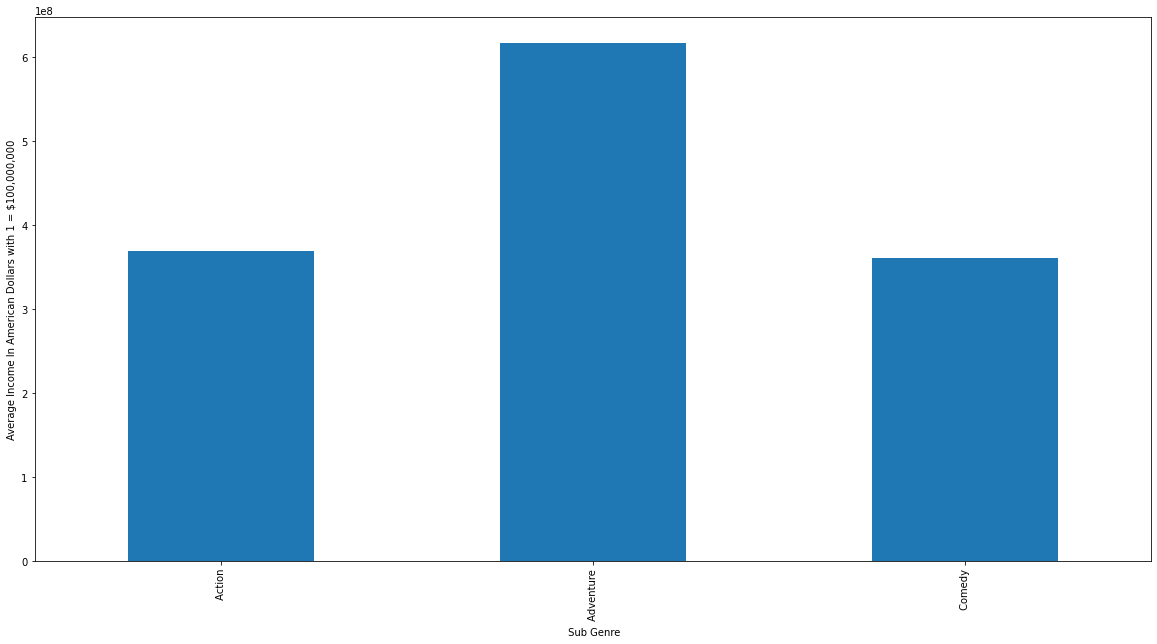

In [31]:
#basic bar graph for sub genre
animation15_20_sub1.plot(x=' Sub Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")

In [32]:
#get more in depth and find sub genre and sub genre average income
animation15_20_sub2 = animation15_20.groupby([' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
animation15_20_sub2

 Sub Genre   Secondary Sub Genre
 Action      Adventure              460513297.5
             Crime                    4462034.0
 Adventure   Comedy                 606807200.2
             Family                 807083670.0
 Comedy      Family                 360516556.5
Name: Worldwide Gross Income, dtype: float64

Text(0, 0.5, 'Average Income In American Dollars with 1 = $100,000,000')

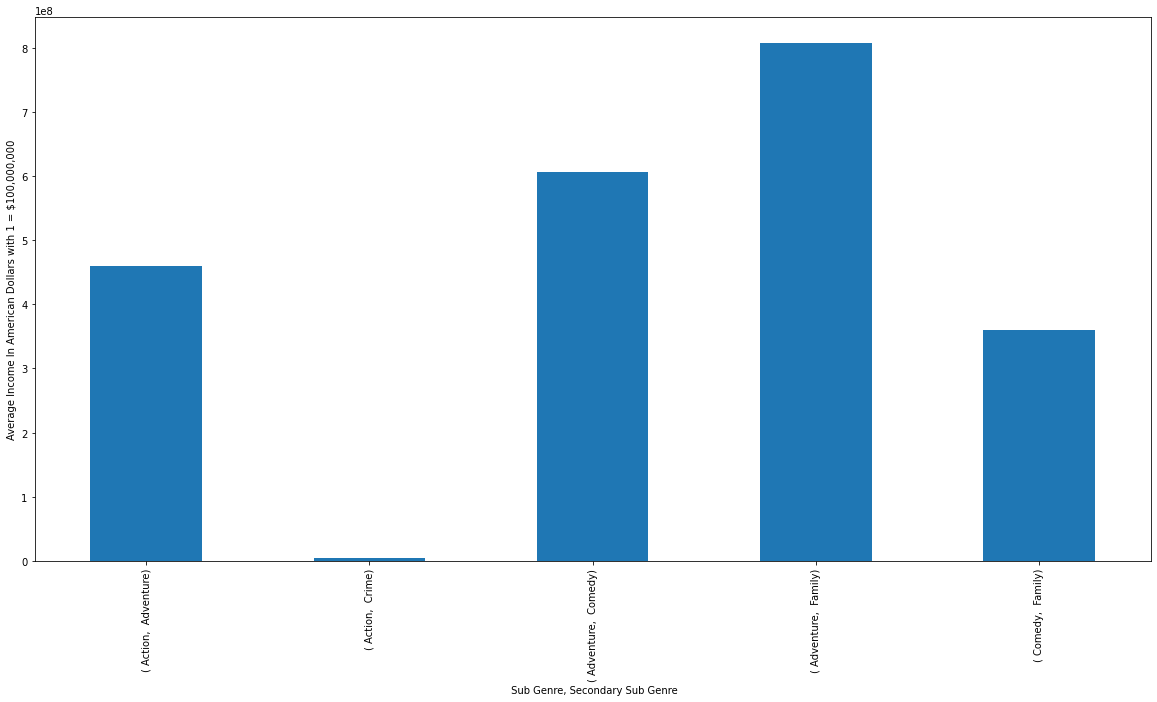

In [33]:
#plot for animation what sub genre and secondary sub genre has highest average 
an = animation15_20_sub2.plot(x=' Sub Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")

In [34]:
action15_20 = Merge_Genres2[Merge_Genres2["Genre"].str.contains("Action")==True]
action15_20

Sub Genre  Secondary Sub Genre  \
1         Drama               Sci-Fi   
2     Adventure                Crime   
5        Horror             Thriller   
7        Horror               Sci-Fi   
8     Adventure              Fantasy   
..          ...                  ...   
334       Crime                Drama   
336   Adventure               Comedy   
337       Crime                Drama   
338       Crime                Drama   
351   Adventure                Drama   

                                                 Title  Unnamed: 0  Movie ID  \
1                                            Bloodshot         309   1634106   
2    Birds of Prey: And the Fantabulous Emancipatio...          44   7713068   
5                                             The Hunt         339   8244784   
7                                           Underwater         336   5774060   
8                                       Fantasy Island          81    983946   
..                                                 ...         ...       ...   
334                                      Run All Night         257   2199571   
336                                            Ant-Man          17    478970   
337                                              Heist         260   3276924   
338                                              Heist         260   3276924   
351                                        San Andreas          57   2126355   

           Date   Genre  RunTime country            Director           Actors  \
1    2020-03-27  Action      109     USA         Dave Wilson       Vin Diesel   
2    2020-06-02  Action      109     USA           Cathy Yan    Margot Robbie   
5    2020-03-24  Action       90     USA         Craig Zobel     Betty Gilpin   
7    2020-01-30  Action       95     USA      William Eubank  Kristen Stewart   
8    2020-02-13  Action      109     USA         Jeff Wadlow     Michael Peña   
..          ...     ...      ...     ...                 ...              ...   
334  2015-04-30  Action      114     USA  Jaume Collet-Serra      Liam Neeson   
336  2015-12-08  Action      117     USA         Peyton Reed        Paul Rudd   
337  2015-11-11  Action       93     USA          Scott Mann   Robert De Niro   
338  2015-11-11  Action       93     USA          Scott Mann   Robert De Niro   
351  2015-05-28  Action      114     USA         Brad Peyton   Dwayne Johnson   

     Average_Vote     Budget  USA Gross Income  Worldwide Gross Income  \
1             5.7   45000000          10021787                30855391   
2             6.1   84500000          84158461               201858461   
5             6.5   14000000           5812500                10530977   
7             5.8   80000000          17291078                40882928   
8             4.9    7000000          26441782                47315959   
..            ...        ...               ...                     ...   
334           6.6   50000000          26461644                71561644   
336           7.3  130000000         180202163               519311965   
337           6.1    8900000             50136                 3777046   
338           6.1    8900000             50136                 3777046   
351           6.1  110000000         155190832               473990832   

     Fan Reviews  Net Profit Worldwide  Year  
1            672             -14144609  2020  
2           2222             117358461  2020  
5            757              -3469023  2020  
7            795             -39117072  2020  
8            635              40315959  2020  
..           ...                   ...   ...  
334          245              21561644  2015  
336          726             389311965  2015  
337          105              -5122954  2015  
338          105              -5122954  2015  
351          624             363990832  2015  

[97 rows x 18 columns]

In [35]:
action15_20_sub = action15_20.groupby([' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
action15_20_sub

 Sub Genre   Secondary Sub Genre
 Adventure   Comedy                 5.552055e+08
             Crime                  2.018585e+08
             Drama                  5.797727e+08
             Fantasy                5.818414e+08
             Mystery                1.792469e+08
             Sci-Fi                 1.018776e+09
 Biography   Drama                  2.060805e+08
 Comedy      Crime                  8.629655e+07
             Drama                  4.366460e+06
             Horror                 1.613705e+07
             Romance                6.075950e+05
 Crime       Drama                  4.072690e+07
             Thriller               1.488922e+08
 Drama       History                5.532749e+07
             Horror                 1.102170e+08
             Sci-Fi                 3.249384e+08
             Thriller               1.515726e+08
             Western                3.067531e+06
 Horror      Sci-Fi                 6.224953e+07
             Thriller               

Text(0, 0.5, 'Average Income In American Dollars with 1 = $1,000,000,000')

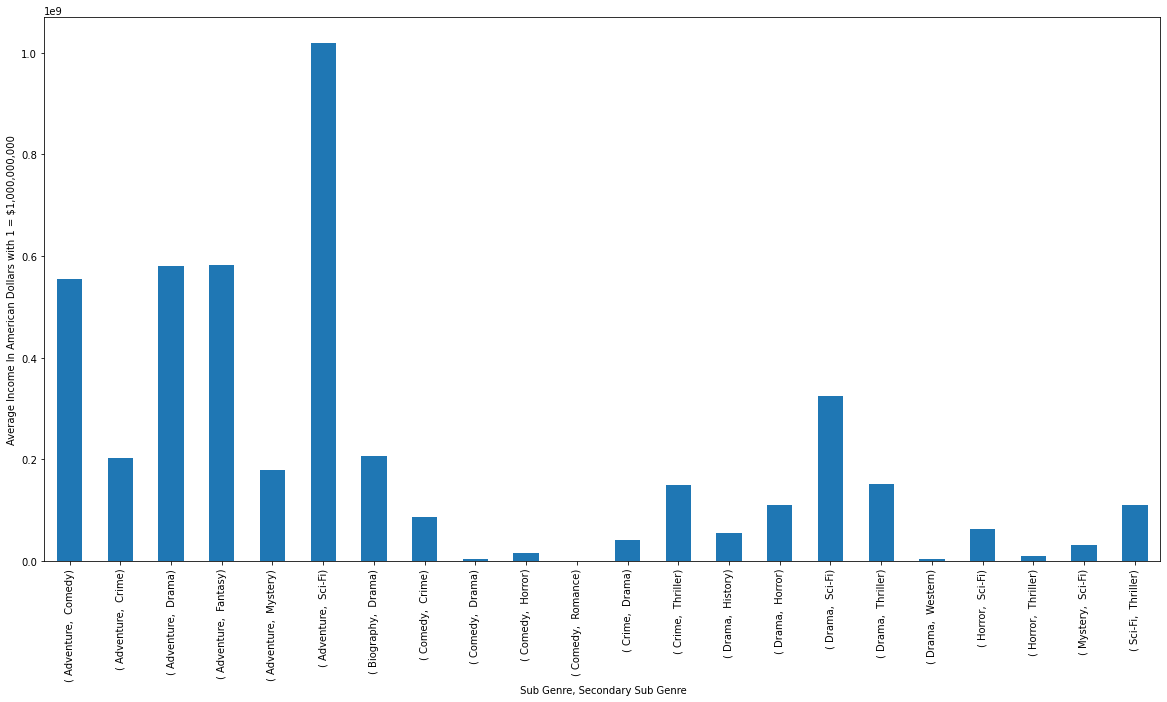

In [36]:
#plot for animation what sub genre and secondary sub genre has highest average 
ac = action15_20_sub.plot(x=' Sub Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $1,000,000,000")

In [37]:
all_15_20_sub = Merge_Genres2.groupby(['Genre', ' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
all_15_20_sub

Genre    Sub Genre   Secondary Sub Genre
Action   Adventure   Comedy                 5.552055e+08
                     Crime                  2.018585e+08
                     Drama                  5.797727e+08
                     Fantasy                5.818414e+08
                     Mystery                1.792469e+08
                                                ...     
Drama    Romance     Thriller               4.708182e+08
Family   Fantasy     Musical                1.264064e+09
Horror   Music       Thriller               3.769214e+06
         Mystery     Sci-Fi                 2.710962e+07
                     Thriller               1.324141e+08
Name: Worldwide Gross Income, Length: 76, dtype: float64

Text(0, 0.5, 'Average Income In American Dollars with 1 = $1,000,000,000')

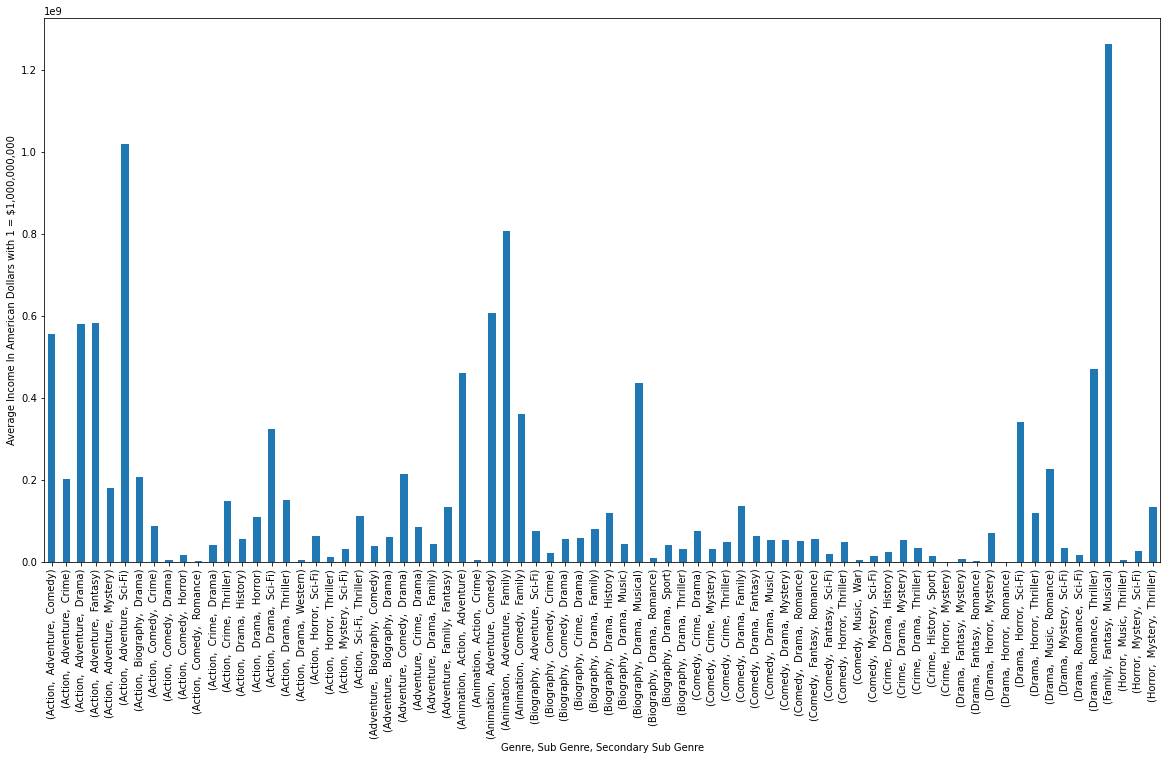

In [38]:
plot_all_sub = all_15_20_sub.plot(x='Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $1,000,000,000")

In [ ]:
#marcus code end